In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load dataset from csv

df = pd.read_csv('C:/Users/win/Desktop/ALL/3MTT/20DaysOfChallenge/Dataset/titanic/train.csv')

In [21]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [23]:
# Count missing values for each column

missing_values = df.isnull()
print("missing values:\n", missing_values)

missing values:
      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare

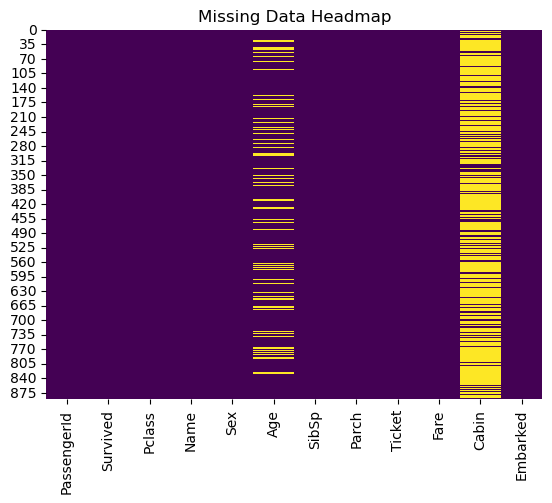

In [31]:
# View missing data with heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Headmap")
plt.show()

In [35]:
# Replace missing 'Age' values with the meadian
df['Age'] = df['Age'].fillna(df['Age'].median())

In [37]:
# Replace missing 'Embarked' values with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [39]:
# Drop the 'Cabin' column since it has many missing values
df.drop('Cabin', axis=1, inplace=True)

In [41]:
# Check missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [43]:
# Summary Statistics
# Numerical Data Statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [47]:
# Categorical Data Statistics
print(df.describe(include=['O']))

                           Name   Sex  Ticket Embarked
count                       891   891     891      891
unique                      891     2     681        3
top     Braund, Mr. Owen Harris  male  347082        S
freq                          1   577       7      646


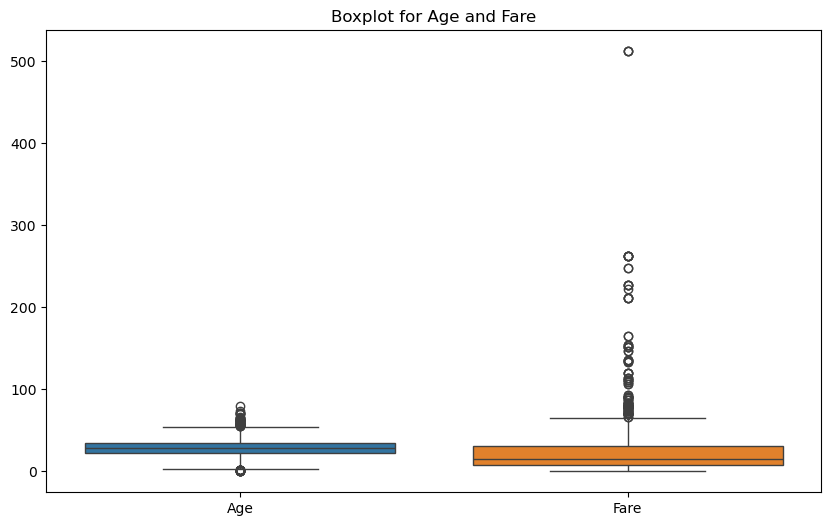

In [51]:
# Detecting and Handlinh Outliers
# Boxplots for Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

In [65]:
# Extreme Outliers
# Cap 'Fare' column at the 95th percentile
fare_95th_percentile = df['Fare'].quantile(0.95)
df['Fare'] = df['Fare'].apply(lambda x: fare_95th_percentile if x > fare_95th_percentile else x)

In [69]:
# Key Observations
# 1. The dataset had missing values in Age, Cabin8 and Embarked.
# 2. The missing values in Age were filled with the median, Embarked with the mode and Cabin was dropped.
# 3. The summary statistics revealed that most passengers were in the lower class (Pclass 3) and paid lower fares.
# 4. Outliers were detected in Fare, with a few extreme values.

In [73]:
df_cleaned = df.copy()
df_cleaned.to_csv('cleaned_EDA_train.csv', index=False)

In [81]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [75]:
# Summary of EDA Findings
# 1. Missing Data: The Age and Embarked columns had missing data, and the Cabin column had too many missing vules to keep.
# 2. Summary Statistics: Most Passengers belonged to the lower class (Pclass 3) and age of passengers was distributed mostly between 20 and 40 years.
# 3. Outliers: Outliers were detected in the Fare column and they were capped to reduce their influence on the analysis.

In [83]:
# Conclusion

# Through Exploratory Data Analysis (EDA), I successfully cleaned the data, analyzed key patterns and prepared the dataset for further modeling or insights.